In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# ----- Câu 1: đọc dữ liệu + đếm số dòng -----
cols = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country",
    "Income"
]

train = pd.read_csv("adult.data.csv", header=None, names=cols)
test  = pd.read_csv("adult.test.csv", header=None, names=cols)

print("Số dòng train:", len(train))
print("Số dòng test :", len(test))
print("Nguyễn Đình Vương - 6351071081\n")

Số dòng train: 32562
Số dòng test : 16282
Nguyễn Đình Vương - 6351071081



In [18]:
import numpy as np
import pandas as pd

cols = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country",
    "income"
]

# Đọc dữ liệu
train = pd.read_csv("adult.data.csv", header=None, names=cols)
test  = pd.read_csv("adult.test.csv", header=None, names=cols)

# Xóa '?'
def clean(df):
    df = df.replace(' ?', np.nan)
    return df.dropna()

train = clean(train)
test  = clean(test)


train = train.drop(columns=["fnlwgt"])


data = pd.concat([train, test], ignore_index=True)


data.info()

print("Nguyễn Đình Vương - 6351071081\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30163 entries, 0 to 30162
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30163 non-null  object
 1   workclass       30163 non-null  object
 2   education       30163 non-null  object
 3   education-num   30163 non-null  object
 4   marital-status  30163 non-null  object
 5   occupation      30163 non-null  object
 6   relationship    30163 non-null  object
 7   race            30163 non-null  object
 8   sex             30163 non-null  object
 9   capital-gain    30163 non-null  object
 10  capital-loss    30163 non-null  object
 11  hours-per-week  30163 non-null  object
 12  native-country  30163 non-null  object
 13  income          30163 non-null  object
 14  fnlwgt          0 non-null      object
dtypes: object(15)
memory usage: 3.5+ MB
Nguyễn Đình Vương - 6351071081



=== Ma trận tương quan Pearson ===
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.030940      0.077229      0.056944   
education-num   0.030940       1.000000      0.125146      0.080972   
capital-gain    0.077229       0.125146      1.000000     -0.031441   
capital-loss    0.056944       0.080972     -0.031441      1.000000   
hours-per-week  0.071558       0.143689      0.082157      0.054467   

                hours-per-week  
age                   0.071558  
education-num         0.143689  
capital-gain          0.082157  
capital-loss          0.054467  
hours-per-week        1.000000  


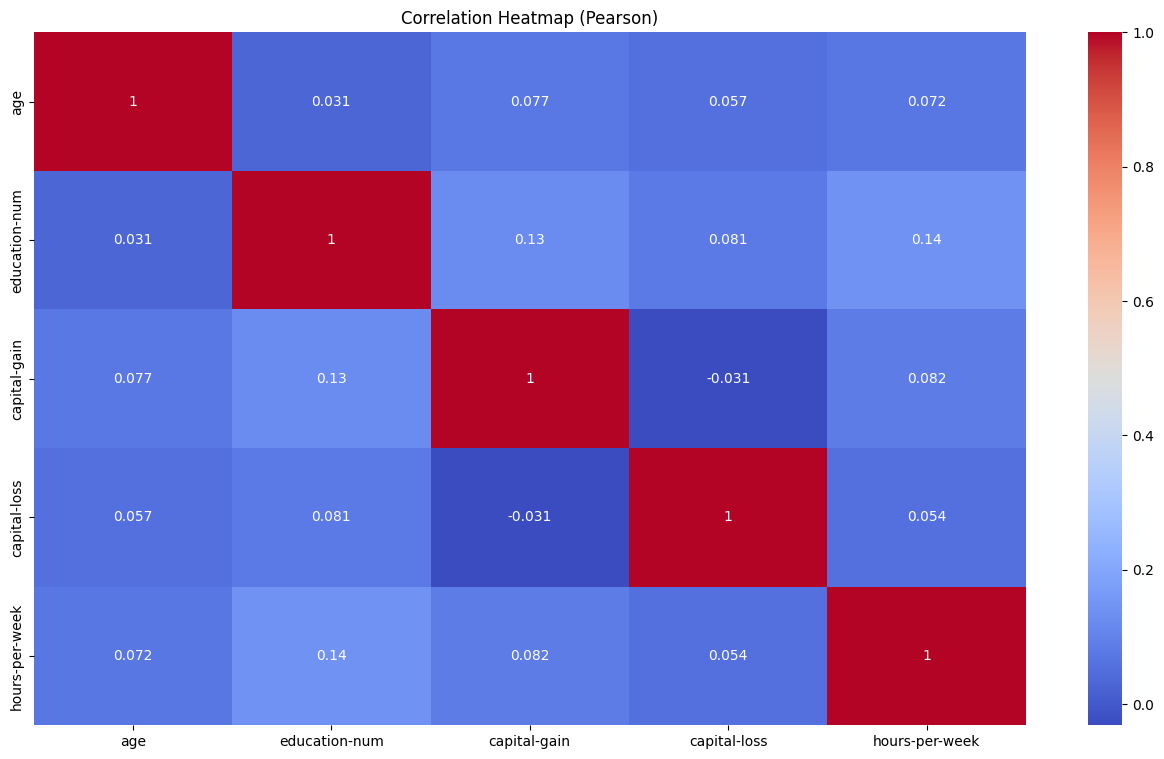

Các cột bị loại do tương quan cao: set()
Kích thước full sau khi loại tương quan: (48842, 14)
Nguyễn Đình Vương - 6351071081



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_cols = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

test_cols = [
    "age","workclass","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

train = pd.read_csv("adult.data.csv", header=None, names=train_cols,
                    na_values=" ?", skipinitialspace=True)
test  = pd.read_csv("adult.test.csv", header=None, names=test_cols,
                    na_values=" ?", skipinitialspace=True)

test["income"] = test["income"].astype(str).str.replace(".", "", regex=False).str.strip()

train = train.dropna()
test  = test.dropna()
train = train.drop(columns=["fnlwgt"])

full = pd.concat([train, test], ignore_index=True)


numeric_cols = ["age", "education-num", "capital-gain",
                "capital-loss", "hours-per-week"]
for c in numeric_cols:
    full[c] = pd.to_numeric(full[c], errors="coerce")

full = full.dropna(subset=numeric_cols)


num_cols = full.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = full[num_cols].corr(method="pearson")

print("=== Ma trận tương quan Pearson ===")
print(corr_matrix)

plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Pearson)")
plt.show()

threshold = 0.9
to_drop = set()
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            to_drop.add(num_cols[j])

print("Các cột bị loại do tương quan cao:", to_drop)

full = full.drop(columns=list(to_drop))
print("Kích thước full sau khi loại tương quan:", full.shape)

print("Nguyễn Đình Vương - 6351071081\n")


In [22]:
import pandas as pd


train_cols = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

test_cols = [
    "age","workclass","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

train = pd.read_csv("adult.data.csv", header=None, names=train_cols,
                    na_values=" ?", skipinitialspace=True)
test  = pd.read_csv("adult.test.csv", header=None, names=test_cols,
                    na_values=" ?", skipinitialspace=True)

test["income"] = test["income"].astype(str).str.replace(".", "", regex=False).str.strip()

train = train.dropna()
test  = test.dropna()

train = train.drop(columns=["fnlwgt"])

data = pd.concat([train, test], ignore_index=True)


features = data.drop("income", axis=1)
labels   = data["income"]

print("Kích thước features:", features.shape)
print("Kích thước labels  :", labels.shape)

print("Nguyễn Đình Vương - 6351071081\n")


Kích thước features: (48844, 13)
Kích thước labels  : (48844,)
Nguyễn Đình Vương - 6351071081



In [23]:
import pandas as pd


train_cols = [
    "age","workclass","fnlwgt","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

test_cols = [
    "age","workclass","education","education-num",
    "marital-status","occupation","relationship","race","sex",
    "capital-gain","capital-loss","hours-per-week","native-country","income"
]

train = pd.read_csv("adult.data.csv", header=None, names=train_cols,
                    na_values=" ?", skipinitialspace=True)
test  = pd.read_csv("adult.test.csv", header=None, names=test_cols,
                    na_values=" ?", skipinitialspace=True)

test["income"] = test["income"].astype(str).str.replace(".", "", regex=False).str.strip()

train = train.dropna()
test  = test.dropna()
train = train.drop(columns=["fnlwgt"])

data = pd.concat([train, test], ignore_index=True)


features = data.drop("income", axis=1)


categorical_cols = features.select_dtypes(include=["object"]).columns

features_onehot = pd.get_dummies(
    features,
    columns=categorical_cols,
    drop_first=False
)

print(features_onehot)
print(features_onehot.shape)
print("Nguyễn Đình Vương - 6351071081\n")


       age_17  age_18  age_19  age_20  age_21  age_22  age_23  age_24  age_25  \
0       False   False   False   False   False   False   False   False   False   
1       False   False   False   False   False   False   False   False   False   
2       False   False   False   False   False   False   False   False   False   
3       False   False   False   False   False   False   False   False   False   
4       False   False   False   False   False   False   False   False   False   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
48839   False   False   False   False   False   False   False   False   False   
48840   False   False   False   False   False   False   False   False   False   
48841   False   False   False   False   False   False   False   False   False   
48842   False   False   False   False   False   False   False   False   False   
48843   False   False   False   False   False   False   False   False   False   

       age_26  ...  native-

In [26]:
import numpy as np
import pandas as pd


train_raw = pd.read_csv("adult.data.csv")
test_raw  = pd.read_csv("adult.test.csv")

def clean(df):
    df = df.replace(' ?', np.nan)
    return df.dropna()

train = clean(train_raw)
test  = clean(test_raw)


n_train = len(train)


if "fnlwgt" in train.columns:
    train = train.drop(columns=["fnlwgt"])


data = pd.concat([train, test], ignore_index=True)


label_col = "income"  # tên cột quyết định
labels = data[label_col]
features = data.drop(columns=[label_col])

# one-hot cho các cột không phải số
features_onehot = pd.get_dummies(features)


X_train = features_onehot.iloc[:n_train, :]
X_test  = features_onehot.iloc[n_train:, :]

y_train = labels.iloc[:n_train]
y_test  = labels.iloc[n_train:]

print("Số dòng X_train:", X_train.shape[0])
print("Số dòng X_test :", X_test.shape[0])
print("Số dòng y_train:", y_train.shape[0])
print("Số dòng y_test :", y_test.shape[0])
print("Nguyễn Đình Vương - 6351071081\n")


Số dòng X_train: 30162
Số dòng X_test : 15060
Số dòng y_train: 30162
Số dòng y_test : 15060
Nguyễn Đình Vương - 6351071081



Accuracy: 0.8175298804780876
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060



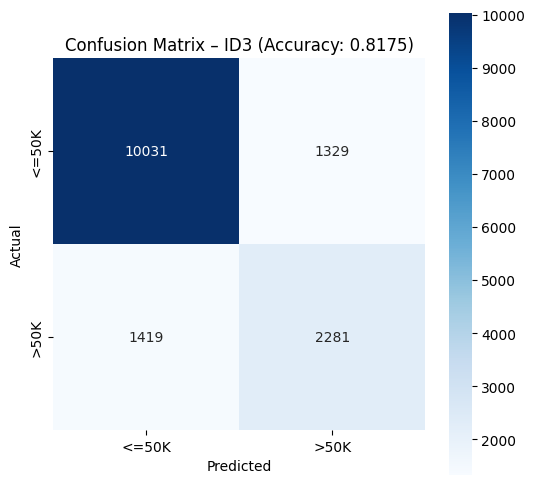

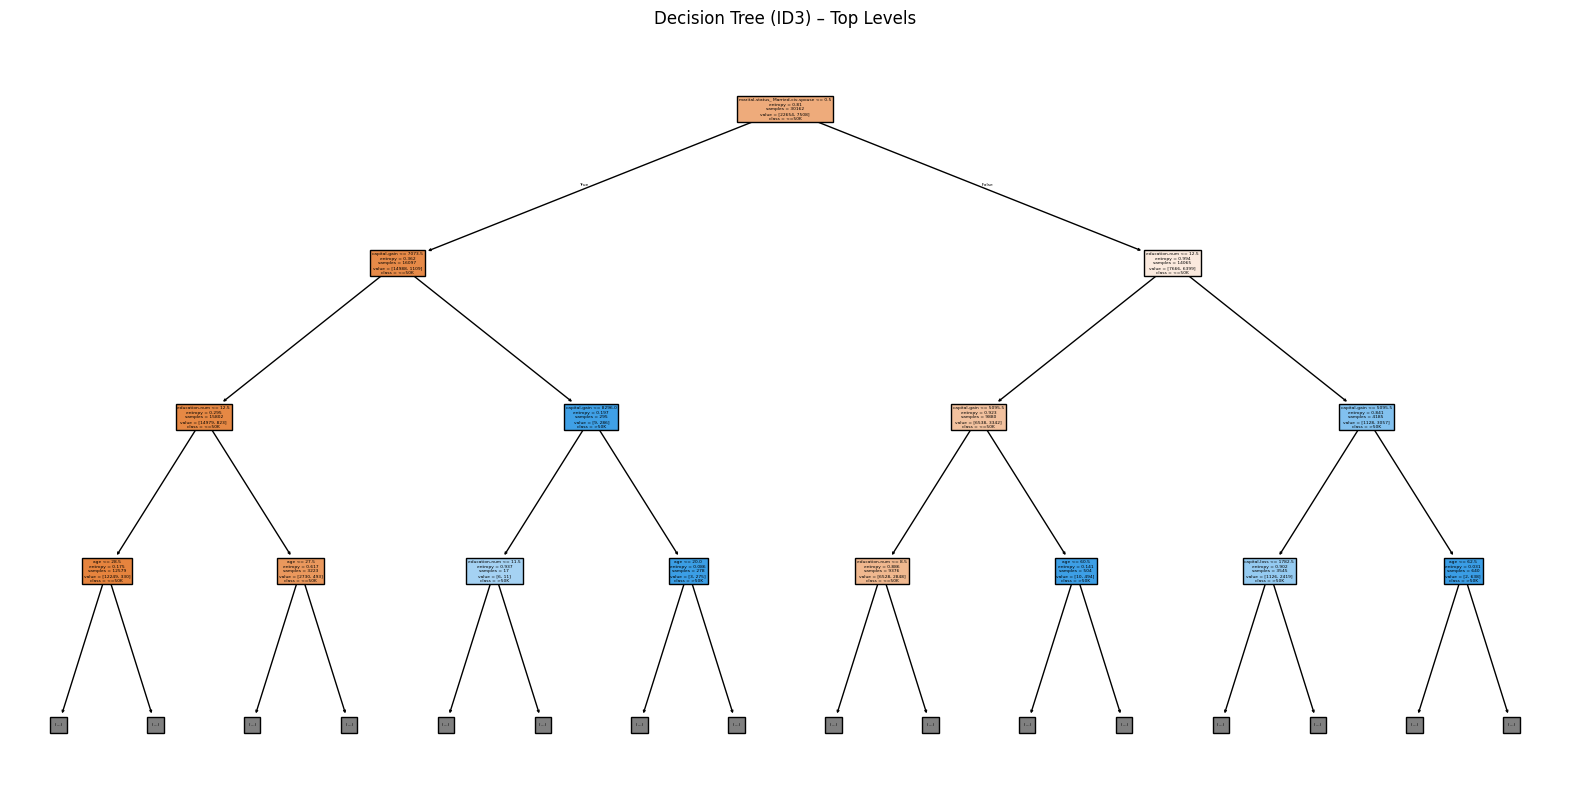

Nguyễn Đình Vương - 6351071081



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

# ===== ĐỌC LẠI DỮ LIỆU =====
train_raw = pd.read_csv("adult.data.csv")
test_raw  = pd.read_csv("adult.test.csv")

def clean(df):
    df = df.replace(' ?', np.nan)
    df = df.dropna()
    # Chuẩn hóa nhãn: bỏ dấu cách + dấu chấm
    df["income"] = df["income"].str.replace(".", "", regex=False).str.strip()
    return df

train = clean(train_raw)
test  = clean(test_raw)

n_train = len(train)

# xóa fnlwgt nếu có
if "fnlwgt" in train.columns:
    train = train.drop(columns=["fnlwgt"])

data = pd.concat([train, test], ignore_index=True)

# ===== TÁCH THUỘC TÍNH / NHÃN =====
labels = data["income"]
features = data.drop(columns=["income"])

features_onehot = pd.get_dummies(features)

X_train = features_onehot.iloc[:n_train, :]
X_test  = features_onehot.iloc[n_train:, :]
y_train = labels.iloc[:n_train]
y_test  = labels.iloc[n_train:]

# ===== CÂY ID3 =====
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(metrics.classification_report(y_test, y_pred))

# ===== MA TRẬN NHẦM LẪN =====
cm = metrics.confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix – ID3 (Accuracy: {acc:.4f})")
plt.show()

# ===== VẼ CÂY =====
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=clf.classes_,
               filled=True,
               max_depth=3)
plt.title("Decision Tree (ID3) – Top Levels")
plt.show()

print("Nguyễn Đình Vương - 6351071081\n")

Accuracy: 0.8122841965471448
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



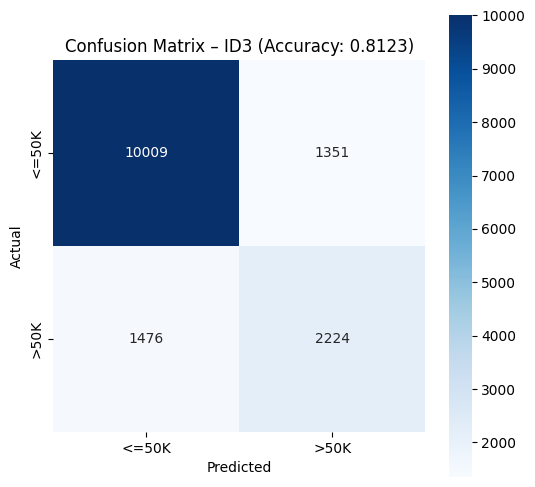

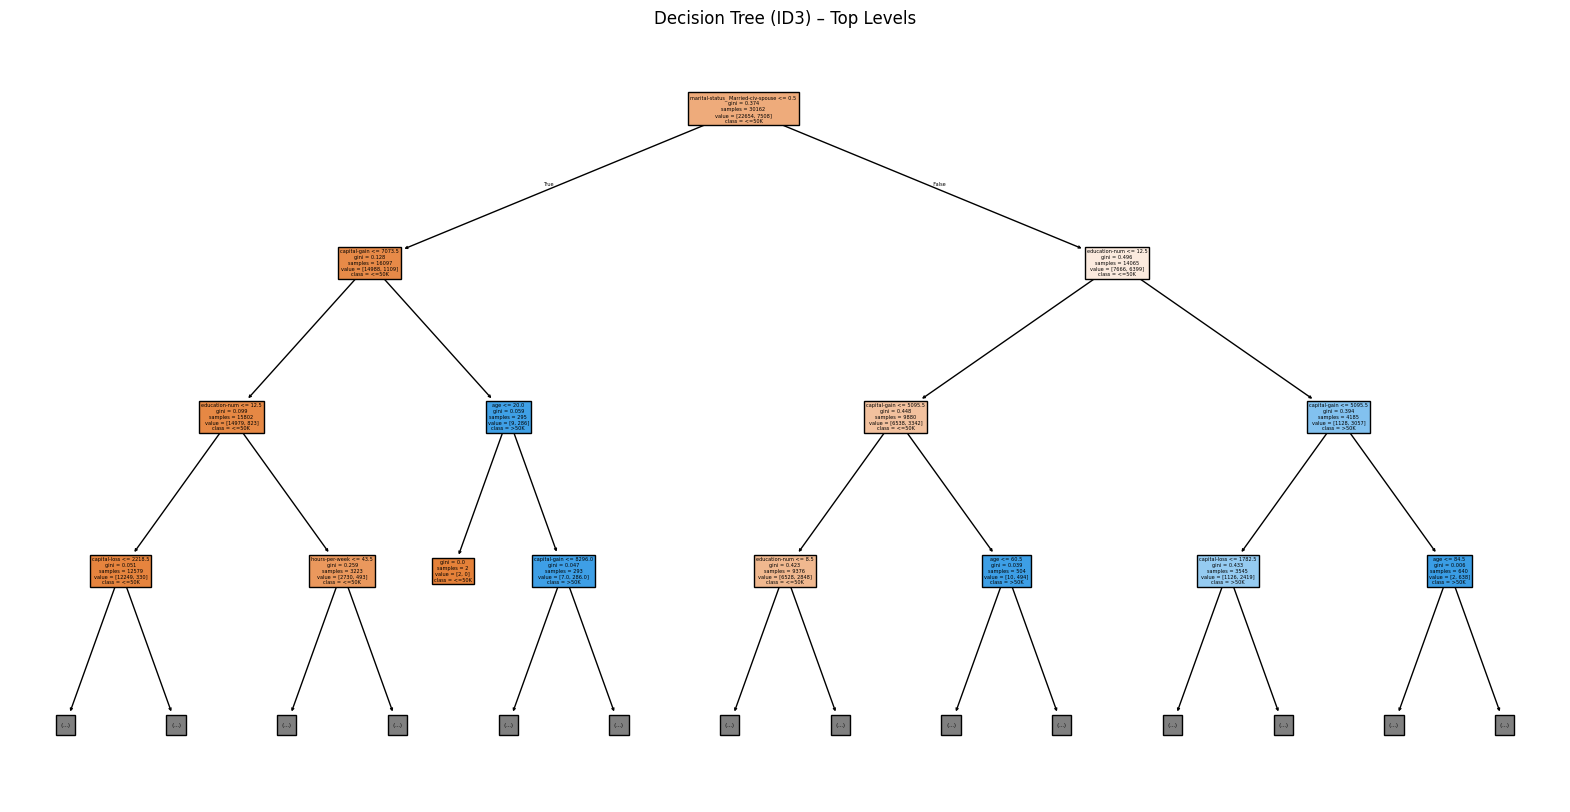

Nguyễn Đình Vương - 6351071081



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

# ===== ĐỌC LẠI DỮ LIỆU =====
train_raw = pd.read_csv("adult.data.csv")
test_raw  = pd.read_csv("adult.test.csv")

def clean(df):
    df = df.replace(' ?', np.nan)
    df = df.dropna()
    # Chuẩn hóa nhãn: bỏ dấu cách + dấu chấm
    df["income"] = df["income"].str.replace(".", "", regex=False).str.strip()
    return df

train = clean(train_raw)
test  = clean(test_raw)

n_train = len(train)

# xóa fnlwgt nếu có
if "fnlwgt" in train.columns:
    train = train.drop(columns=["fnlwgt"])

data = pd.concat([train, test], ignore_index=True)

# ===== TÁCH THUỘC TÍNH / NHÃN =====
labels = data["income"]
features = data.drop(columns=["income"])

features_onehot = pd.get_dummies(features)

X_train = features_onehot.iloc[:n_train, :]
X_test  = features_onehot.iloc[n_train:, :]
y_train = labels.iloc[:n_train]
y_test  = labels.iloc[n_train:]

# ===== CÂY ID3 =====
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(metrics.classification_report(y_test, y_pred))

# ===== MA TRẬN NHẦM LẪN =====
cm = metrics.confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["<=50K", ">50K"],
            yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix – ID3 (Accuracy: {acc:.4f})")
plt.show()

# ===== VẼ CÂY =====
plt.figure(figsize=(20, 10))
tree.plot_tree(clf,
               feature_names=X_train.columns,
               class_names=clf.classes_,
               filled=True,
               max_depth=3)
plt.title("Decision Tree (ID3) – Top Levels")
plt.show()

print("Nguyễn Đình Vương - 6351071081\n")

Accuracy: 0.8029216467463479
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



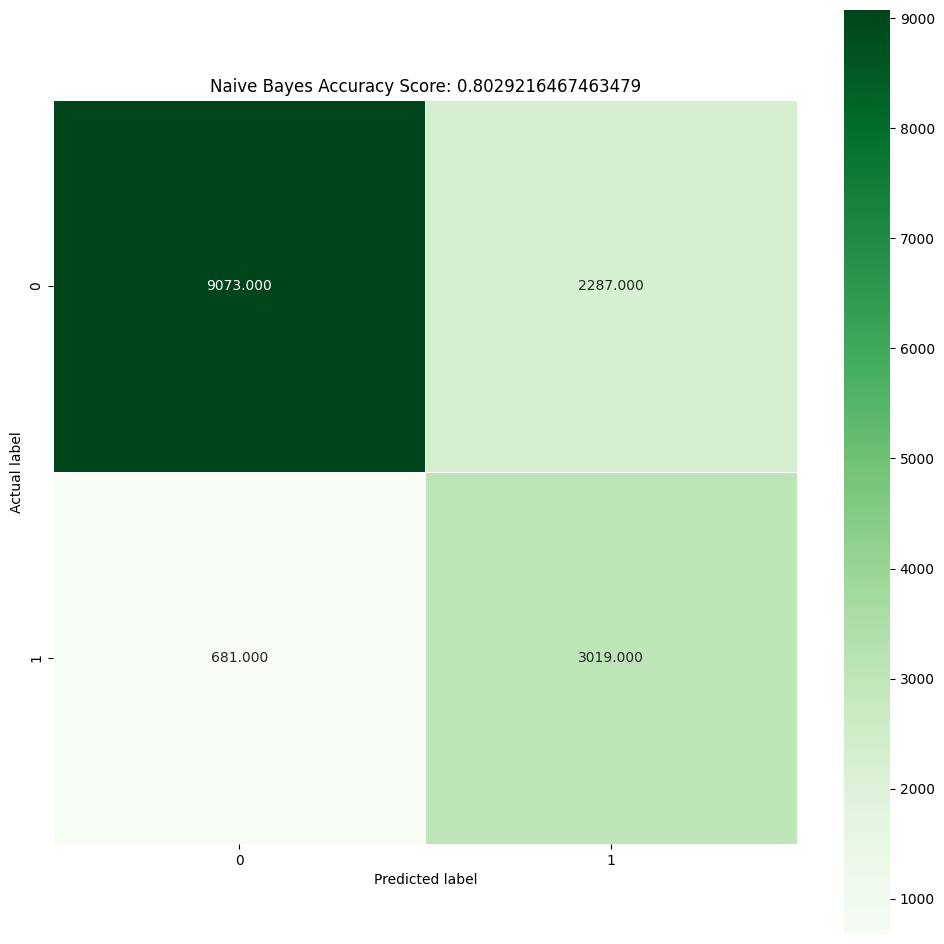

Nguyễn Đình Vương - 6351071081



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# ===== ĐỌC + TIỀN XỬ LÝ =====
train_raw = pd.read_csv("adult.data.csv")
test_raw  = pd.read_csv("adult.test.csv")

def clean(df):
    df = df.replace(' ?', np.nan)
    df = df.dropna()
    df["income"] = df["income"].str.replace(".", "", regex=False).str.strip()
    return df

train = clean(train_raw)
test  = clean(test_raw)

n_train = len(train)

# xóa fnlwgt trong train
if "fnlwgt" in train.columns:
    train = train.drop(columns=["fnlwgt"])

# nối lại
data = pd.concat([train, test], ignore_index=True)

# ===== TÁCH THUỘC TÍNH + NHÃN =====
labels = data["income"]
features = data.drop(columns=["income"])

# one-hot
features_onehot = pd.get_dummies(features)

X_train = features_onehot.iloc[:n_train, :]
X_test  = features_onehot.iloc[n_train:, :]
y_train = labels.iloc[:n_train]
y_test  = labels.iloc[n_train:]

# ===== NAIVE BAYES =====
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# ===== KẾT QUẢ =====
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(metrics.classification_report(y_test, y_pred))

# ===== MA TRẬN NHẦM LẪN =====
cm = metrics.confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])

plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Greens")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title(f"Naive Bayes Accuracy Score: {acc}")
plt.show()
print("Nguyễn Đình Vương - 6351071081\n")

